# Tutorial  ARtiSANS code 

This is a tutorial for the usage of the ARtiSANS (Analytic Re-evaluation of Supernova Axion and Neutrino Streaming) code, which can be employed for the analytic computation of the neutrino and axion luminosities and mean energies in the presence of ALP (axion-like-particle) nuclear Bremsstrahlung and/or Primakoff emission.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys, math

## Importing the code

In [8]:
import SNaxion
import par

### PNS variables

In order to run the analytic computation we need to fix 6 proto-neutron star (PNS) variables

In [29]:
Mpns = 1.5 # PNS mass [solar mass units]
Rpns = 12 # PNS radius  [km]
g = 0.04 # density correction factor
YPf = 0.3 # proton fraction

Since coherent scattering is suppressed for earlier times, we will consider an initial and a final phase in the PNS evolution, such that we need to fix initial and final opacity boosting factors $\beta$ and total energy emitted by neutrinos $E_{\rm tot}$:

In [12]:
# initial phase:
beta1 = 3 
EnuTot1 = 4e+52 #[erg]
# final phase:
beta2 = 40
EnuTot2 = 1e+53 #[erg]

### Standard Model Case

First we can compute the neutrino observables for the case with neutrino emission only

In [13]:
# initialization
SMnu = SNaxion.SNnu()
# compute neutrino luminosity, neutrino average energy and total energy emmited in the initial and final phases
LumNuSM, ENuMSM, EtotSMi, EtotSMf= SMnu.calcAllSM(Mpns, Rpns, g*beta1, EnuTot1, g*beta2, EnuTot2, tinit=0.01, tfinal=500)

### Nuclear Bremsstrahlung Case

Let us now consider only axion-nucleon Bremsstrahlung emission. 

First we need to initialize the model by setting $M_{\rm PNS}$, $R_{\rm PNS}$ and the axion-nucleon coupling $g_{aNN}$ via the method `SNaxionBrem(Mpns, Rpns, gaNN)`. 

After that, the function `calcAll(` $g \beta_i$, $E_{\rm tot}^{i}$, $g \beta_f$, $E_{\rm tot}^{f}$ `, tinit, tfinal)` computes the axion and neutrino luminosities [${\rm erg} \, {\rm s}^{-1}$] and the neutrino average energy [${\rm MeV}$] considering both the intial and final phases, following equations (A5) and (A6) of the paper. The parameters `tinit` and `tfinal` set the initial and final evaluation times. All the computed observables are functions of the time.

In [14]:
### Three different choices for gaNN:

## gaNN = 5e-11
SNag5e11 = SNaxion.SNaxionBrem(Mpns, Rpns, gaNN= 5e-11)
LumAxg5e11 , LumNug5e11, Enug5e11  = SNag5e11.calcAll(g*beta1, EnuTot1,g*beta2, EnuTot2,tinit=0.01,tfinal=500)

## gaNN = 5e-10
SNag5e10 = SNaxion.SNaxionBrem(Mpns, Rpns, 5e-10)
LumAxg5e10, LumNug5e10, Enug5e10  = SNag5e10.calcAll(g*beta1, EnuTot1,g*beta2, EnuTot2,tinit=0.01,tfinal=500)

## gaNN = 1e-11
SNag1e11 = SNaxion.SNaxionBrem(Mpns, Rpns, 1e-11)
LumAxg1e11 , LumNug1e11, Enug1e11  = SNag1e11.calcAll(g*beta1, EnuTot1,g*beta2, EnuTot2,tinit=0.01,tfinal=500)


We can plot the neutrino luminosities and mean energies

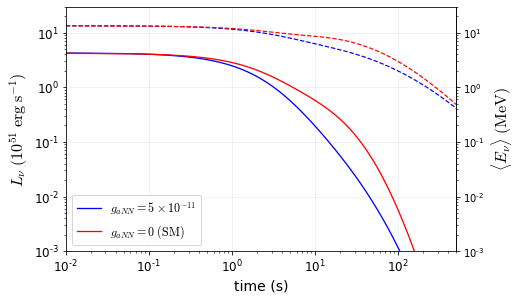

In [91]:
fig, ax = plt.subplots(figsize=(7.,4.5))

tvar=np.linspace(0.01, 500, 10000)

# gaNN = 5e-11
ax.plot(tvar,Enug5e11(tvar),lw=1.2,color = 'blue',ls="dashed")
ax.plot(tvar, LumNug5e11(tvar)/1e+51,lw =1.3,
        color = 'blue',label='$g_{aNN} =5 \\times 10^{-11}$')

# SM case
ax.plot(tvar, ENuMSM(tvar),lw=1.2,color = 'red',ls="dashed")
ax.plot(tvar, LumNuSM(tvar)/1e+51,lw =1.3, color = 'red',
        label='$g_{aNN} = 0 \\; (\\mathrm{SM})$')

secax = ax.secondary_yaxis('right')
secax.set_ylabel('$\\langle  E_\\nu \\rangle \; (\\mathrm{MeV}) $',fontsize = 16)

plt.legend(loc="lower left",ncol=1,fontsize = 12)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("time (s)",fontsize = 14)
plt.ylabel("$L_\\nu \\; (10^{51} \\; \\mathrm{erg} \\; \\mathrm{s}^{-1})$",fontfamily="serif",fontsize = 16)
plt.xlim(0.01,500);
plt.ylim(1e-3,30);

plt.minorticks_on()
plt.grid(which='major', alpha=0.2, zorder = -10)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

### Primakoff Emission Case

Let us now consider only axion-photon Primakoff emission.

We need to initialize the model by setting $M_{\rm PNS}$, $R_{\rm PNS}$ and the axion-photon coupling $g_{a \gamma \gamma}$ (`gagg`) via the method `SNaxionBPrim(Mpns, Rpns, gagg, gaNN= 0.5e-10, cB= 0., YpF=0.3)`. The `cB` option controls whether we want to include axion-nucleon Bremsstrahlung also. By default it is set to `cB=0`. The proton fraction as default is fixed to $Y_p =0.3$.

In [33]:
## gagg = 1e-12 without nuclear Brem (cB=0)
SNpe12 = SNaxion.SNaxionBPrim(Mpns, Rpns,1e-12, cB=0., YpF=YPf)

Similarly as before, the function `calcAllPB(` $g \beta_i$, $E_{\rm tot}^{i}$, $g \beta_f$, $E_{\rm tot}^{f}$ `, tinit, tfinal)` computes the neutrino observables considering both the intial and final phases.

In [32]:
LumApe12, LumNupe12, Enupe12  = SNpe12.calcAllPB(g*beta1, EnuTot1,g*beta2, EnuTot2,tinit=0.01, tfinal=100)

/Users/anafoguel/Desktop/Projetos_IC/SNflux/2021/py_code/SNaxion.py:282: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  intF = quad(self.Fint,1e-4,50,args=(s, eps,))
/Users/anafoguel/Desktop/Projetos_IC/SNflux/2021/py_code/SNaxion.py:282: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intF = quad(self.Fint,1e-4,50,args=(s, eps,))
/Users/anafoguel/Desktop/Projetos_IC/SNflux/2021/py_code/SNaxion.py:291: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyz

Some comments: 

- we still have some Warnings on the integral evaluation 
- the axion-photon coupling $g_{a \gamma \gamma}$ cannot be too big, otherwise the function gives numerical instabilities

Now, let us plot the neutrino luminosities and mean energies

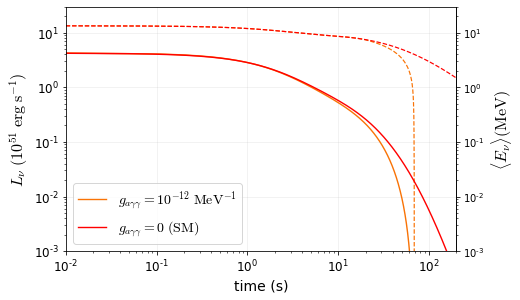

In [89]:
plt.rcParams["mathtext.fontset"] = "cm"
fig, ax = plt.subplots(figsize=(7.,4.5))

t=np.linspace(0.01, 100, 1000)
t2=np.linspace(0.01, 69, 1000)
tSM=np.linspace(0.01, 200, 10000)


# gagg = 1e-12 without nuclear Brem (cB=0)
ax.plot(t2,Enupe12(t2),lw=1.2,color = 'xkcd:orange',ls="dashed")
ax.plot(t, (LumNupe12(t))/1e+51,lw =1.4,
        color = 'xkcd:orange',label='$g_{a\\gamma\\gamma} =10^{-12}  \; \\rm{MeV}^{-1}$',ls="solid")


# SM case
ax.plot(tSM, ENuMSM(tSM),lw=1.2,color = 'red',ls="dashed")
ax.plot(tSM, LumNuSM(tSM)/1e+51,lw =1.4, color = 'red',
        label='$g_{a\\gamma\\gamma} = 0 \\; (\\mathrm{SM})$')


secax = ax.secondary_yaxis('right')
secax.set_ylabel('$\\langle  E_\\nu \\rangle (\\mathrm{MeV}) $',fontsize = 16)

plt.legend(loc="lower left",ncol=1,fontsize = 14)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("time (s)",fontsize = 14)
plt.ylabel("$L_\\nu \\; (10^{51} \\; \\mathrm{erg} \\; \\mathrm{s}^{-1})$",fontfamily="serif",fontsize = 16)
plt.xlim(0.01,200)
plt.ylim(1e-3,30)

plt.minorticks_on()
plt.grid(which='major', alpha=0.2, zorder = -10)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

### Primakoff + Nuclear Bremsstrahlung Emission Case

Let us now consider axion-nucleon and axion-photon interactions.

Using the `SNaxionBPrim()` method with `cB=1` enables also Bremsstrahlung emission.

In [40]:
# gaNN = 5e-11 ; gagg = 5e-13
SNp5e13b5em11 = SNaxion.SNaxionBPrim(Mpns, Rpns,gagg=5e-13,gaNN=5e-11,cB= 1.)
LumAp5e13b5em11, LumNup5e13b5em11, Enup5e13b5em11  = SNp5e13b5em11.calcAllPB(g*beta1, EnuTot1,g*beta2, EnuTot2,tinit=0.01, tfinal=200)

/Users/anafoguel/Desktop/Projetos_IC/SNflux/2021/py_code/SNaxion.py:282: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  intF = quad(self.Fint,1e-4,50,args=(s, eps,))
/Users/anafoguel/Desktop/Projetos_IC/SNflux/2021/py_code/SNaxion.py:282: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intF = quad(self.Fint,1e-4,50,args=(s, eps,))
/Users/anafoguel/Desktop/Projetos_IC/SNflux/2021/py_code/SNaxion.py:291: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyz

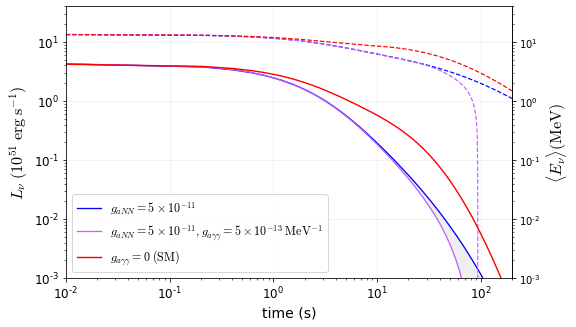

In [85]:
plt.rcParams["mathtext.fontset"] = "cm"
fig, ax = plt.subplots(figsize=(8.,5))
t=np.linspace(0.01, 200, 1000)
t3=np.linspace(0.01, 94, 1000)


# gaNN = 5e-11
ax.plot(t,Enug5e11(t),lw=1.2,color = 'blue',ls="dashed")
ax.plot(t, LumNug5e11(t)/1e+51,lw =1.3, color = 'blue',label='$g_{aNN} =5 \\times 10^{-11}$')

# gaNN = 5e-11 ; gagg = 5e-13
ax.plot(t3,Enup5e13b5em11(t3),lw=1.2,color = 'xkcd:bright lavender',ls="dashed")
ax.plot(t, (LumNup5e13b5em11(t))/1e+51,lw =1.3,
        color = 'xkcd:bright lavender',label='$g_{aNN} =5 \\times 10^{-11}, g_{a\\gamma\\gamma} = 5 \\times 10^{-13} \; \\rm{MeV}^{-1}$')

plt.fill_between(t, (LumNup5e13b5em11(t))/1e+51, (LumNug5e11(t))/1e+51, alpha=0.35, color='lightgray')

# SM case
tSM=np.linspace(0.01, 200, 10000)
ax.plot(t, LumNuSM(t)/1e+51,lw =1.4, color = 'red', label='$g_{a\\gamma\\gamma} = 0 \\; (\\mathrm{SM})$')
ax.plot(t, ENuMSM(t),lw=1.2,color = 'red',ls="dashed")


secax = ax.secondary_yaxis('right')
secax.set_ylabel('$\\langle  E_\\nu \\rangle (\\mathrm{MeV}) $',fontsize = 16)

plt.legend(loc="lower left",ncol=1,fontsize = 12)

plt.yscale('log')
plt.xscale('log')
plt.xlabel("time (s)",fontsize = 14)
plt.ylabel("$L_\\nu \\; (10^{51} \\; \\mathrm{erg} \\; \\mathrm{s}^{-1})$",fontfamily="serif",fontsize = 16)
plt.xlim(0.01,200)
plt.ylim(1e-3,40)

plt.minorticks_on()
plt.grid(which='major', alpha=0.2, zorder = -10)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

### Axion Luminosity

The methods `calcAll()` and `calcAllPB()` also return the axion luminosities as function of time.

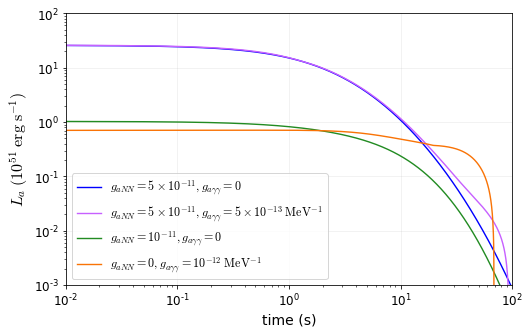

In [83]:
plt.rcParams["mathtext.fontset"] = "cm"
fig, ax = plt.subplots(figsize=(8.,5))
t=np.linspace(0.01, 200, 10000)
t2=np.linspace(0.01, 100, 10000)

# gaNN = 5e-11
ax.plot(t, LumAxg5e11(t)/1e+51,lw =1.4,
        color = 'blue',label='$g_{aNN} =5 \\times 10^{-11}, g_{a\\gamma\\gamma} =0$')

# gaNN = 5e-11 ; gagg = 5e-13
ax.plot(t, LumAp5e13b5em11(t)/1e+51,lw =1.4,
        color = 'xkcd:bright lavender',label='$g_{aNN} = 5 \\times 10^{-11}, g_{a\\gamma\\gamma} = 5 \\times 10^{-13}  \; \\rm{MeV}^{-1}$')

# gaNN = 1e-11
ax.plot(t, LumAxg1e11(t)/1e+51,lw =1.4,
        color = 'forestgreen',label='$g_{aNN} =10^{-11}, g_{a\\gamma\\gamma} =0$')

# gagg = 1e-12 
ax.plot(t2, LumApe12(t2)/1e+51,lw =1.4,
        color = 'xkcd:orange',label='$g_{aNN} = 0, g_{a\\gamma\\gamma} =  10^{-12} \; \\rm{MeV}^{-1}$')


plt.legend(loc="lower left",ncol=1,fontsize = 12)

plt.yscale('log')
plt.xscale('log')
plt.xlabel("time (s)",fontsize = 14)
plt.ylabel("$L_a \\; (10^{51} \\; \\mathrm{erg} \\; \\mathrm{s}^{-1})$",fontfamily="serif",fontsize = 16)
plt.xlim(0.01,100)
plt.ylim(1e-3,1e+2)

plt.minorticks_on()
# plt.grid(which='minor', alpha=0.2, zorder = -12)
plt.grid(which='major', alpha=0.2, zorder = -10)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);


### Emitted Energy

Inside the `SNnu()` method there is a function `calcEtemp(lum, tinit, tfinal, step)` that can be used to calculate the total emmited energy up to time $t$ emmited by the input luminosity `lum`.

For example lets consider some cases:

In [56]:
## gaNN = 1e-11
Etot1e11A = SMnu.calcEtemp(LumAxg1e11, tinit=0.011, tfinal=50, step=200) #for one neutrino flavor 
Etot1e11Nu = SMnu.calcEtemp(LumNug1e11, tinit=0.011, tfinal=50, step=200)

In [58]:
## gaNN = 5e-11
Etot5e11A = SMnu.calcEtemp(LumAxg5e11, tinit=0.011, tfinal=50, step=200)
Etot5e11Nu = SMnu.calcEtemp(LumNug5e11, tinit=0.011, tfinal=50, step=200)

In [61]:
## gagg = 1e-12
EtotApe12A = SMnu.calcEtemp(LumApe12, tinit=0.011, tfinal=50, step=200)
EtotApe12Nu = SMnu.calcEtemp(LumNupe12, tinit=0.011, tfinal=50, step=200)

In [62]:
# gaNN = 5e-11 ; gagg = 5e-13
EtotAp5e13b5em11A = SNp5e13b5em11.calcEtemp(LumAp5e13b5em11, tinit=0.011, tfinal=50, step=200)
EtotAp5e13b5em11Nu = SNp5e13b5em11.calcEtemp(LumNup5e13b5em11, tinit=0.011, tfinal=50, step=200)

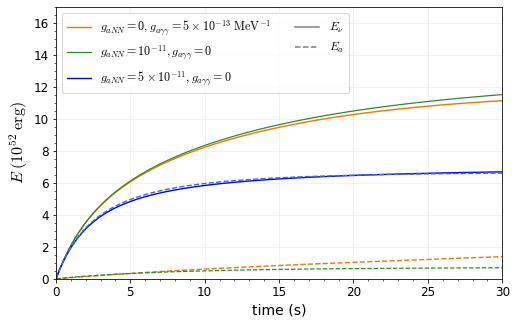

In [81]:
plt.rcParams["mathtext.fontset"] = "cm"
fig, ax = plt.subplots(figsize=(8.,5))
t= np.linspace(0.011, 50, 200)

ax.plot(t, 6*EtotApe12Nu(t)/1e+52,lw =1.4,
        color = 'xkcd:orange',label='$g_{aNN} = 0, g_{a\\gamma\\gamma} = 5 \\times 10^{-13} \; \\rm{MeV}^{-1}$')

ax.plot(t, 6*Etot1e11Nu(t)/1e+52,lw =1.2,
        color = 'forestgreen',label='$g_{aNN} = 10^{-11}, g_{a\\gamma\\gamma} =0$')

ax.plot(t, 6*Etot5e11Nu(t)/1e+52,lw =1.4,
        color = 'blue',label='$g_{aNN} =5 \\times 10^{-11}, g_{a\\gamma\\gamma} =0$')

ax.plot(t, EtotApe12A(t)/1e+52,lw =1.4,color = 'xkcd:orange',ls= 'dashed')

ax.plot(t, Etot1e11A(t)/1e+52,lw =1.2,color = 'forestgreen',ls= 'dashed')

ax.plot(t, Etot5e11A(t)/1e+52,lw =1.4,color = 'royalblue',ls= 'dashed')


ax.plot(0,0,label="$E_\\nu$",c = "gray",ls="solid")
ax.plot(0,0,label="$E_a$",c = "gray",ls="dashed")

plt.legend(loc="upper left",ncol=2,fontsize = 12)

plt.xlabel("time (s)",fontsize = 14)
plt.ylabel("$E \\; (10^{52} \\; \\mathrm{erg})$",fontfamily="serif",fontsize = 16)
plt.xlim(0,30)
plt.ylim(0,17)

plt.minorticks_on()
plt.grid(which='major',alpha=0.2, zorder = -10)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

So, for example, the total energy emitted by neutrinos and axions up to $t = 20$s is equal to:

In [96]:
## gaNN = 5e-11
print ("Enu =", 6*Etot5e11Nu(20),"[erg] \t Ea =", Etot5e11A(20),"[erg]")

Enu = 6.465945151191468e+52 [erg] 	 Ea = 6.479745862150911e+52 [erg]


In [98]:
## gaNN = 1e-11
print ("Enu =", 6*Etot1e11Nu(20),"[erg] \t Ea =", Etot1e11A(20),"[erg]")

Enu = 1.0497771799588519e+53 [erg] 	 Ea = 6.400773703348427e+51 [erg]
